In [6]:
import sqlite3
import pandas
database_name = "/home/becode/Downloads/Documents/churn_prediction/data/database.db"
conn = sqlite3.connect(database_name)
df = pandas.read_sql('SELECT * FROM bank_churners', conn)
#df = df[['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book']]
conn.close()

In [7]:
df['avg_amt'] = df["Total_Trans_Amt"]/df['Total_Trans_Ct']

In [8]:
from sklearn.compose import make_column_selector as selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)
categorical_transformer =  OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(transformers=[("num", numeric_transformer, selector(dtype_exclude=object)),('cat', categorical_transformer, selector(dtype_include=object))])

clf = Pipeline(steps=[('preprocessor', preprocessor),('classifier',  KMeans(n_clusters=3, n_init=10, max_iter=200))])
km_clusters = clf.fit_predict(df)
df['km_clusters']=km_clusters

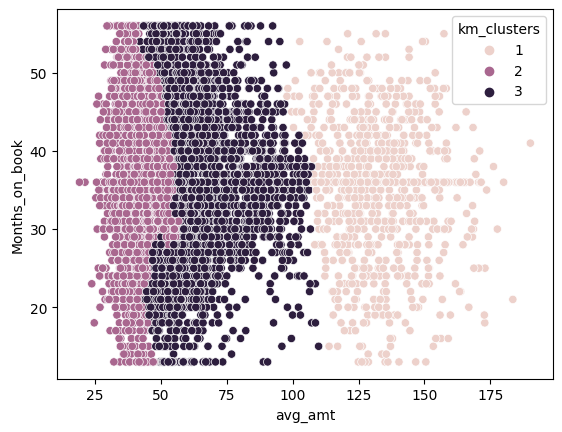

In [9]:
# Import linkage and fcluster functions
import seaborn as sns
from scipy.cluster.hierarchy import linkage, fcluster
# Use the linkage() function to compute distance
Z = linkage(df[['avg_amt','Months_on_book','km_clusters']], 'ward')
# Generate cluster labels
df['km_clusters'] = fcluster(Z, 3, criterion='maxclust')
# Plot the points with seaborn
sns.scatterplot(x='avg_amt', y='Months_on_book', hue='km_clusters', data=df[['avg_amt','Months_on_book','km_clusters']])
plt.show()

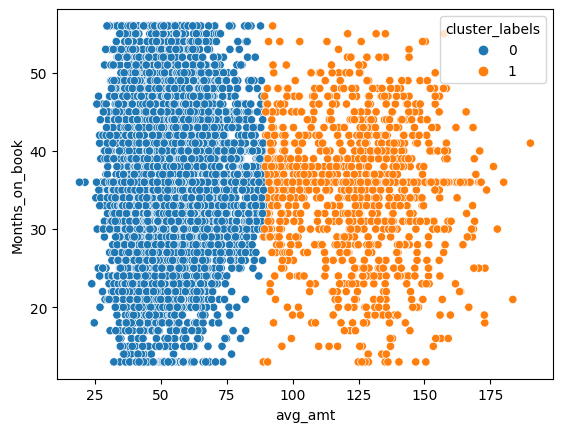

In [11]:
# Import kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Compute cluster centers
centroids,_ = kmeans(df[['avg_amt','Months_on_book']], 2)

# Assign cluster labels
df['cluster_labels'], _ = vq(df[['avg_amt','Months_on_book']], centroids)

# Plot the points with seaborn
sns.scatterplot(x='avg_amt', y='Months_on_book', hue='cluster_labels', data=df[['avg_amt','Months_on_book','cluster_labels']])
plt.show()

In [ ]:
def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > 8 else ''
def unpack(val:pandas._libs.interval.Interval):
    var_list = []
    for k in val.keys():
        res = round(k.left,1).astype(str) +" - "+ round(k.right,1).astype(str)
        var_list.append(res)
    return var_list

In [ ]:
def show_bar_chart(cluster_number:int = 1):
  df3 = df[df['km_clusters']==cluster_number]
  fig, axs = plt.subplots(1, 3, figsize=(22,6), sharey=True)

  income_category_values = df3.value_counts('Income_Category', normalize=True)
  axs[0].tick_params(axis='both', which='major', labelsize=9)
  axs[0].bar(list(income_category_values.keys()), income_category_values)
  axs[0].set_xlabel('Income Category', fontsize = 'x-large')

  dependent_count_values = df3['Dependent_count'].value_counts(bins=6, normalize=True)
  axs[1].bar(unpack(dependent_count_values), dependent_count_values)
  axs[1].set_xlabel('Dependents', fontsize = 'x-large')
  axs[1].tick_params(axis='both', which='major', labelsize=9)

  values_education = df3.value_counts('Education_Level', normalize=True)
  axs[2].tick_params(axis='both', which='major', labelsize=7)
  axs[2].bar(list(values_education.keys()), values_education)
  axs[2].set_xlabel('Education Category', fontsize = 'x-large')

  fig.suptitle('KPI - II')
  plt.tight_layout()

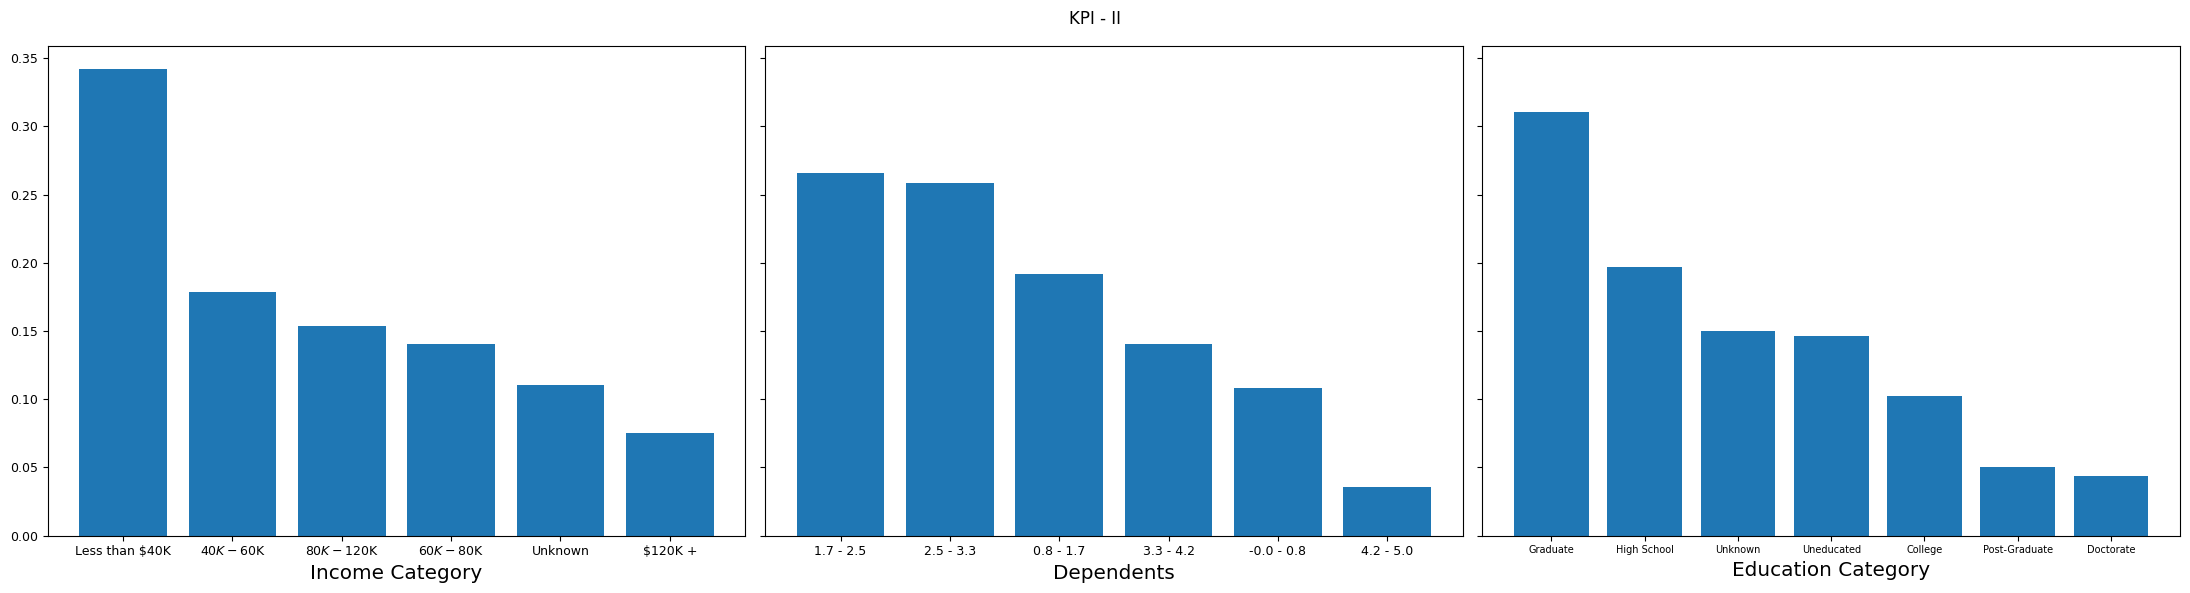

In [ ]:
show_bar_chart(2)

In [ ]:
import pandas
import pickle
frame = {'Total_Relationship_Count':5,'Credit_Limit':8256.0, 'Total_Revolving_Bal':777, 'Avg_Open_To_Buy':11914.0, 'Total_Trans_Amt':1144, 'Total_Trans_Ct':42}

data_frame = pandas.DataFrame([frame])
with open("model-name.pkl", "rb") as file:
    model = pickle.load(file)

prediction = model.predict(data_frame)
print("The ", prediction[0])

The  Existing Customer


In [ ]:
import pandas
import pickle
def print_prediction(model_file, data_frame):
    
    with open(model_file, "rb") as file:
        model = pickle.load(file)
    data_frame = pandas.DataFrame(data=frame)
    #Predict class or regression value for X.
    prediction = model.predict(data_frame)

    # Predict class probabilities of the input samples X.
    prediction_percentage = model.predict_proba(data_frame)[:,1]

    return prediction, prediction_percentage

In [ ]:

frame = {'Total_Relationship_Count':[5],'Credit_Limit':[8256.0], 'Total_Revolving_Bal':[777], 'Avg_Open_To_Buy':[11914.0], 'Total_Trans_Amt':[1144], 'Total_Trans_Ct':[42]}
#frame = {'Total_Relationship_Count':[5, 6, 4, 3, 5],'Credit_Limit':[12691.0, 8256.0, 3418.0, 3313.0, 4716.0], 'Total_Revolving_Bal':[777, 864, 0, 2517, 0], 'Avg_Open_To_Buy':[11914.0, 7392.0, 3418.0 , 796.0,4716.0], 'Total_Trans_Amt':[1144,1291,1887, 1171, 816], 'Total_Trans_Ct':[42, 33, 20, 20, 28]}
data_frame = pandas.DataFrame(data=frame)

for var in data_frame.iterrows():
    prediction, prediction_percentage = print_prediction("model-name.pkl", var)
    
data_out =pandas.DataFrame()
data_out_keys = []
for var in list(prediction):
    data_out_keys.append(var)

data_out_perc = []
for var in list(prediction_percentage):
    perc = '{:.1%}'.format(var)
    data_out_perc.append(perc)

for x in range(0, len(data_out_perc)):
    print(data_out_keys[x], data_out_perc[x])


Existing Customer 83.8%


In [ ]:
for x in range(0, len(data_out_perc)):
    print(data_out_keys[x], data_out_perc[x])

Existing Customer 0.84 %
Existing Customer 0.84 %
Attrited Customer 0.27 %
Existing Customer 0.84 %
Attrited Customer 0.27 %
